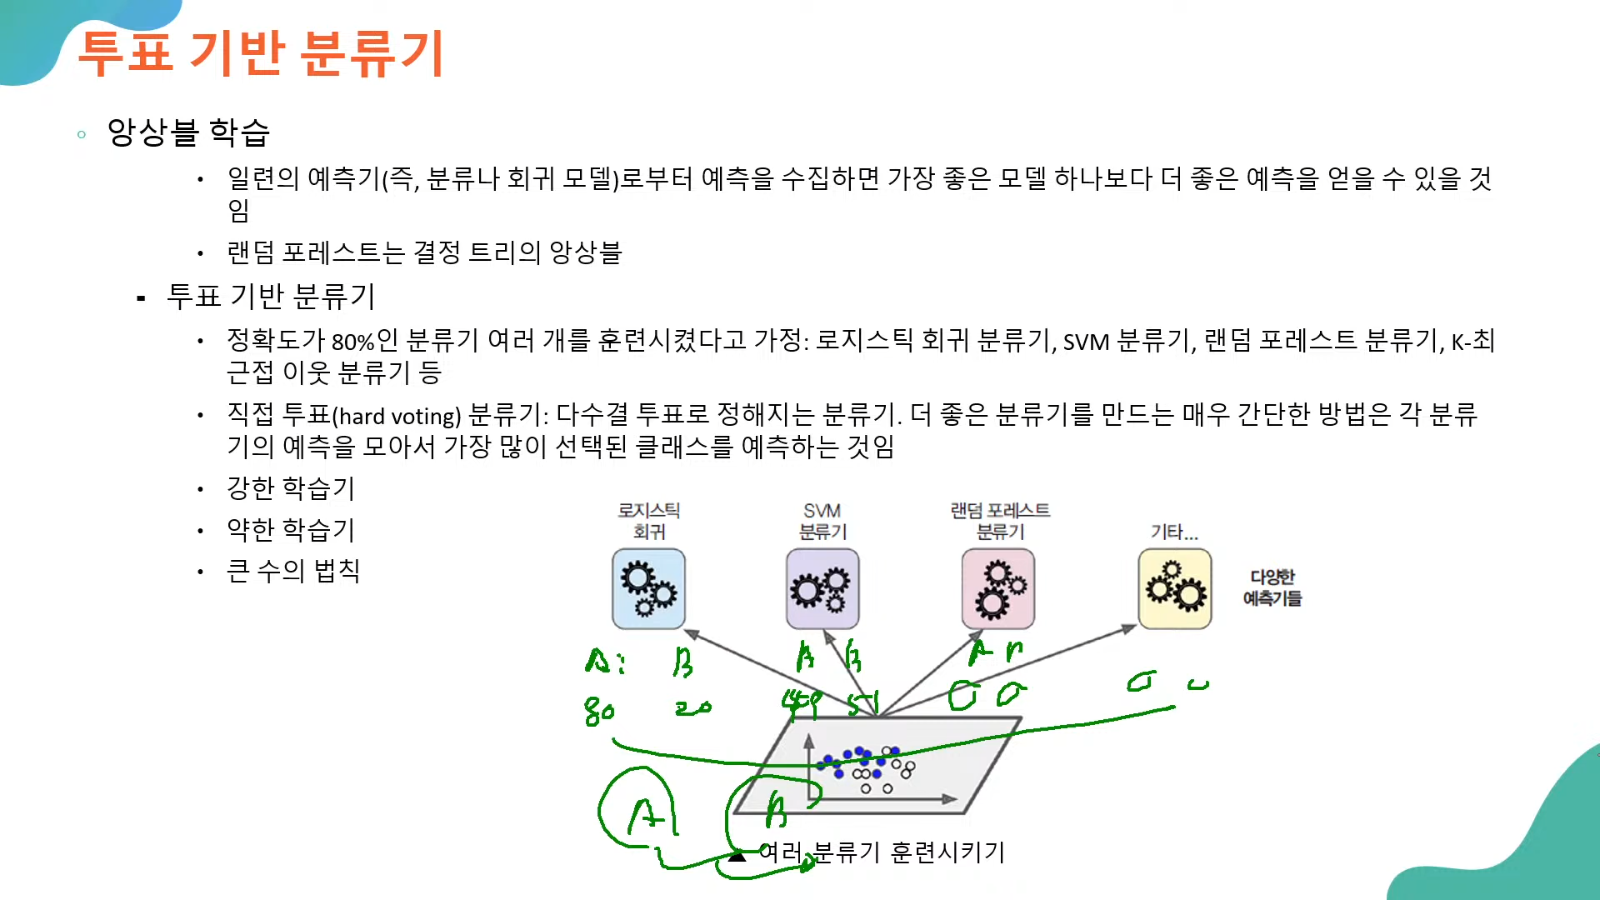

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [15]:
x, y = make_moons(n_samples=500, noise=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

log_clf = LogisticRegression(random_state=42)
log_clf.fit(x_train, y_train)
y_pred = log_clf.predict(x_test)
print('score:{}'.format(accuracy_score(y_test, y_pred)))

score:0.864


In [5]:
log_clf = LogisticRegression(random_state=42)
dec_clf = DecisionTreeClassifier()
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dec_clf), ('svc', svm_clf)],
    voting='hard' # 'hard' = voting 방식이 직접 투표방식임
)

for clf in (log_clf, dec_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('name:{}, score:{}'.format(clf.__class__.__name__, accuracy_score(y_test, y_pred))) # voting system 을 사용했을 때 점수가 더 좋게 나옴

name:LogisticRegression, score:0.864
name:DecisionTreeClassifier, score:0.856
name:SVC, score:0.896
name:VotingClassifier, score:0.904


In [18]:
from sklearn.ensemble import RandomForestClassifier # 다른 모델을 써서 해보자

log_clf2 = LogisticRegression(random_state=42)
rad_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf2 = SVC(random_state=42, probability=True) # 결과값을 probability 값을 나타내 줌(Voting 모델이 간접 투표 방식일 때 이렇게 함)

voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf2), ('rf', rad_clf2), ('svc', svm_clf2)],
    voting='soft' # 투표방식 'soft' 는 간접 투표 방식임, 간접방식으로 사용하려면 해당 모델이 확률값으로 나태내주어야 함
)

for clf in (log_clf2, rad_clf2, svm_clf2, voting_clf2):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('name:{}, score:{}'.format(clf.__class__.__name__, accuracy_score(y_test, y_pred))) # voting system 을 사용했을 때 점수가 더 좋게 나옴

name:LogisticRegression, score:0.864
name:RandomForestClassifier, score:0.896
name:SVC, score:0.896
name:VotingClassifier, score:0.92


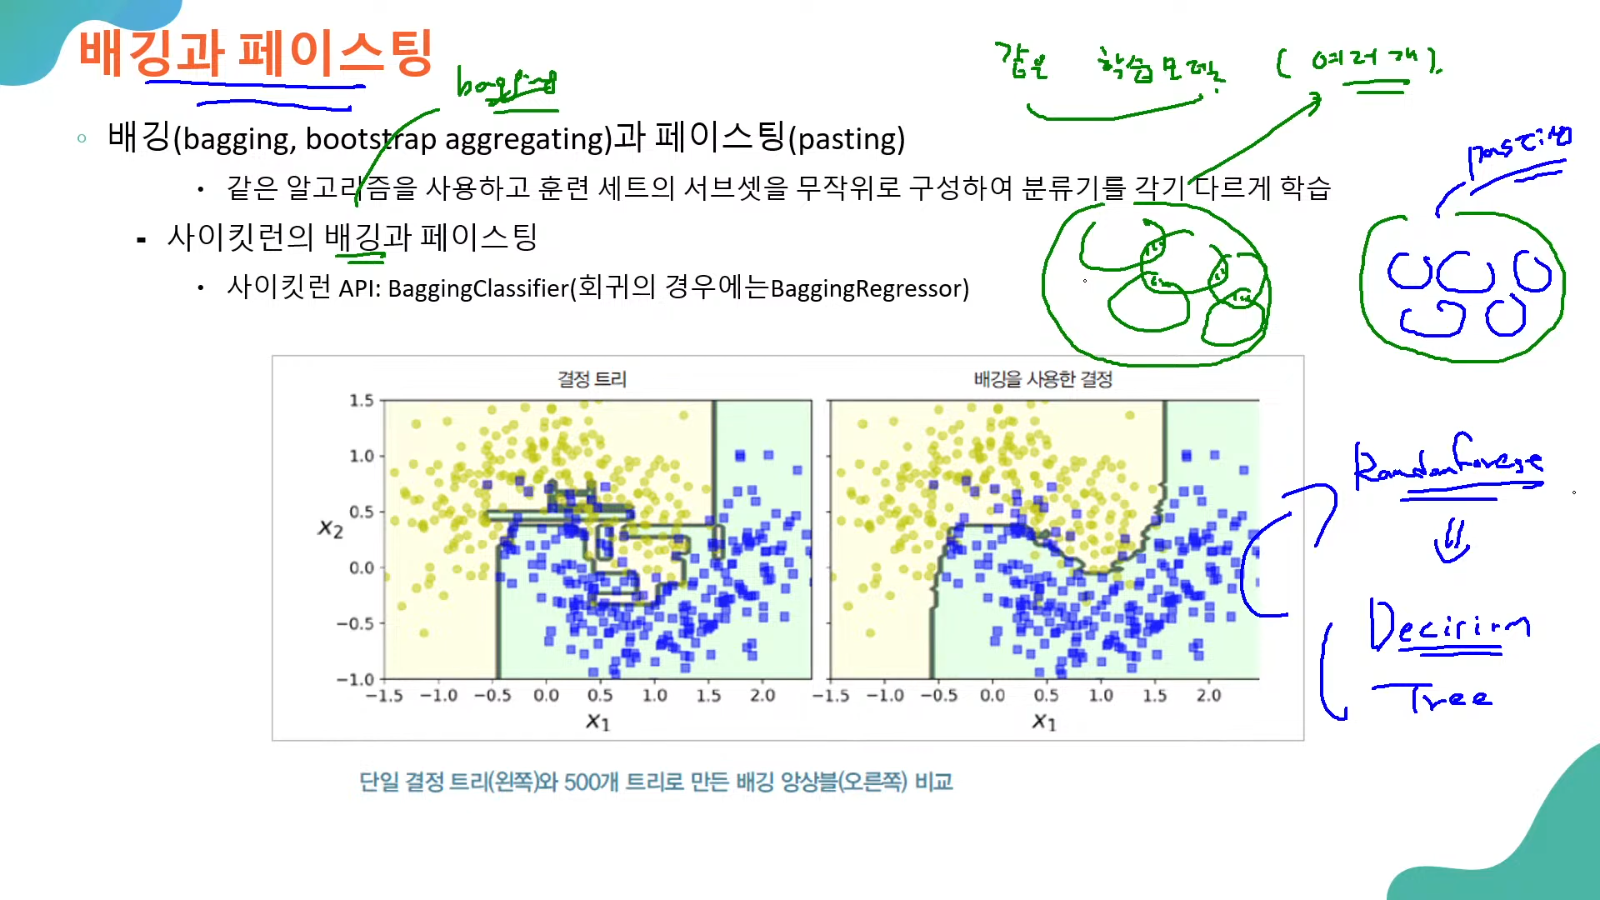

또다른 앙상블 모델인데 같은 학습 모델을 여러개 사용함. 학습할 때 데이터를 랜덤하게 취해서 가져옴, 이 때 중복될 수 있게 가져오는 방법이 배깅, 중복되지 않게 취하는 것이 페이스팅임. 랜덤포레스트는 일반적으로 쓰기에 성능이 좋은데 배깅/페이스팅 시스템을 사용함. 랜덤포레스트는 여러개의 디시젼 트리를 사용하는 것임. bagging 이 좋을 때가 있고 페이스팅이 잘 나올 때가 있다.

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, random_state=42  # n_estimators 는 사용할 모델의 개수, max_samples 는 가져올 샘플의 개수, bootstrap을 True로 하면 bagging 사용
)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print('Bagging scores :', accuracy_score(y_test, y_pred))

Bagging scores : 0.904


In [21]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=False, random_state=42  # n_estimators 는 사용할 모델의 개수, max_samples 는 가져올 샘플의 개수, bootstrap을 False 로 하면 pasting 사용
)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print('Bagging scores :', accuracy_score(y_test, y_pred))

Bagging scores : 0.92


In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1) # n_jobs는 estimator 수가 증가할 때 학습 부하가 생기는 데, -1은 현재 시스템에 가용한 쓰레드를 다 가져다가 쓰라는 의미
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print('Score로 점수 계산 :', rf_clf.score(x_test, y_test)) # 모델명에 score를 사용하면 predict 로 y_pred 를 계산해서 accuracy_score 로 점수 내지 않고 바로 점수 뽑을 수 있음
print('Accuracy Score로 점수 계산:', accuracy_score(y_test, y_pred))

Score로 점수 계산 : 0.965034965034965
Accuracy Score로 점수 계산: 0.965034965034965
